<h1>K-Nearest Neighbors</h1>

Der Parameter K beschreibt wie viele Datenpunkte angeschaut werden, um die Zugehörigkeit festzustellen. 

Dabei wird die Entfernung von dem ausgehenden Punkt zu den K-Nachbarn gemessen, z. B. mit der Euklidischen Distanz. 

<i>Abb1:</i> KNN, 3 Klassen, K = 2.

<img src="files_data/img/sklearn_knn_1.PNG" width=600 hight= 400>

In der Abbildung 1 sind die grünen Punkte am nächsten dran. Deswegen gehört der pinke Punkt dem grünen Cluster an.

<i>Abb2:</i> Verschiedene Werte für K.

<img src="files_data/img/sklearn_knn_2.PNG" width=900 hight= 400>

Ein Problem was auftauchen kann ist, dass wenn der Wert von K sehr hoch ist, viele andere Datenpunkte in Betracht  gezogen werden, um die Zugehörigkeit zu bestimmen, was zu einer falschen Klassifikation führt. <br>


In [ ]:
# // Content is coming

Der Wert von K muss also vorsichtig ausgewählt werden.

Wir können KNN an dem Iris Dataset testen.

In [25]:
import pandas as pd

from sklearn.datasets  import load_iris
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score  # Cross Validation 

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
# Lade Iris Daten.
iris_data = load_iris()
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
# Erstelle Dataframe
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Füge Target hinzu
iris_df = pd.concat([iris_df, pd.DataFrame(iris_data.target, columns=['flower'])], axis='columns')
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


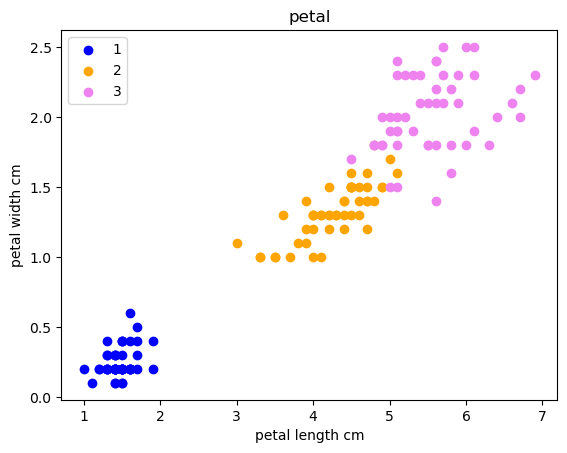

In [9]:
%matplotlib inline

# Plote petal length #

plt.title('petal')
plt.xlabel('petal length cm')
plt.ylabel('petal width cm')
df1 = iris_df[ iris_df['flower']==0 ] # Sortiere Klassen aus.
df2 = iris_df[ iris_df['flower']==1 ]
df3 = iris_df[ iris_df['flower']==2 ]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', label="1")   # Erstelle Plot
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="orange", label="2")
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color="violet", label="3")
plt.legend()

Jetzt kann das Model erstellt und trainiert werden.

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors ist der Parameter "K".

In [32]:
# Prüfe Score mit Cross Validation. 
cross_val_score(knn, iris_df[['petal length (cm)','petal width (cm)']], \
               iris_df['flower'], cv=3)
             

array([0.98, 0.94, 0.96])